AWS Deployments & Managing Infrastructure At Scale

O que é o CloudFormation

    O CloudFormation é uma forma declarativa de descrever a infraestrutura da sua AWS, para quaisquer recursos (a maioria deles é suportada).

    Por exemplo, dentro de um modelo do CloudFormation, você declara:
    Eu quero um grupo de segurança
    Eu quero duas instâncias EC2 usando esse grupo de segurança
    Eu quero um bucket S3
    Eu quero um balanceador de carga (ELB) na frente dessas máquinas
    Então, o CloudFormation cria esses recursos para você, na ordem correta, com a configuração exata que você especifica.

Benefícios do AWS CloudFormation (1/2)

    • Infraestrutura como código
        • Nenhum recurso é criado manualmente, o que é excelente para controle
        • As alterações na infraestrutura são revisadas por meio de código

    • Custo
        • Cada recurso dentro da pilha é marcado com um identificador para que você possa ver facilmente quanto custa uma pilha
        • Você pode estimar os custos de seus recursos usando o modelo CloudFormation
        • Estratégia de economia: No ambiente de desenvolvimento, você pode automatizar a exclusão de modelos às 17h e recriá-los com segurança às 8h da manhã

    • Produtividade
        • Capacidade de destruir e recriar uma infraestrutura na nuvem instantaneamente
        • Geração automatizada de diagrama para seus modelos!
        • Programação declarativa (sem necessidade de descobrir a ordem e orquestração)

    • Não reinvente a roda
        • Aproveite os modelos existentes na web!
        • Aproveite a documentação

    • Suporta (quase) todos os recursos da AWS:
        • Tudo o que veremos neste curso é suportado
        • Você pode usar "recursos personalizados" para recursos que não são suportados.

CloudFormation Stack Designer

    Example: 
        • WordPress CloudFormation Stack
        • We can see all the resources
        • We can see the relations between the components 
    
Ele é muito quando queremos repetir nossa infraestrutura para diferentes regiões, assim você só reproveita o código para criar toda a infra de outra região. Você pode usar o código de uma conta em outra se for o caso...

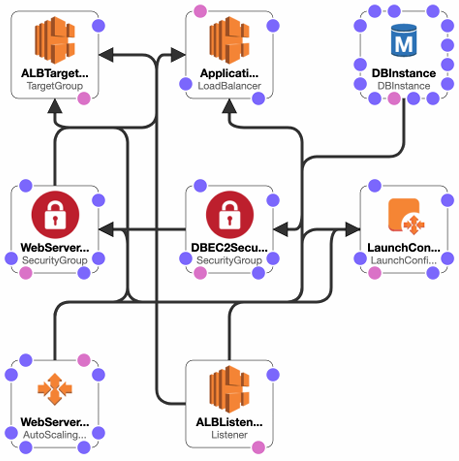


Para criar um CloudFormation, você deve ir no menu da esquerda, e e enviar o arquivo do com as configurações do Cloud Formation. Lembrando, deve ser YML ou Json

AWS Cloud Development Kit (CDK)

    • Defina sua infraestrutura na nuvem usando uma linguagem familiar:
    • JavaScript/TypeScript, Python, Java e .NET
    • O código é "compilado" em um modelo CloudFormation (JSON/YAML)
    • Portanto, você pode implantar infraestrutura e código de tempo de execução da aplicação juntos
    • Ótimo para funções Lambda
    • Ótimo para contêineres Docker no ECS / EKS

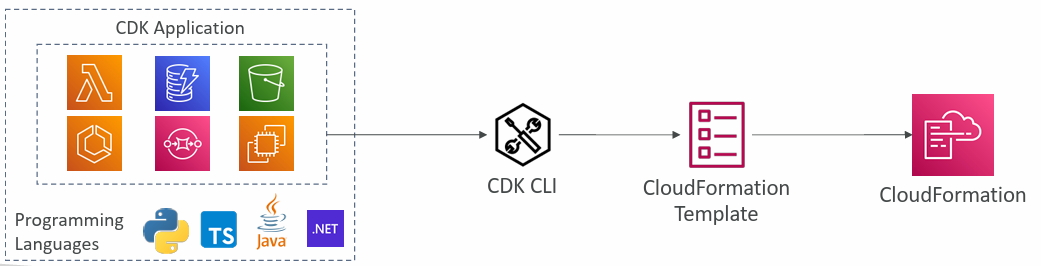

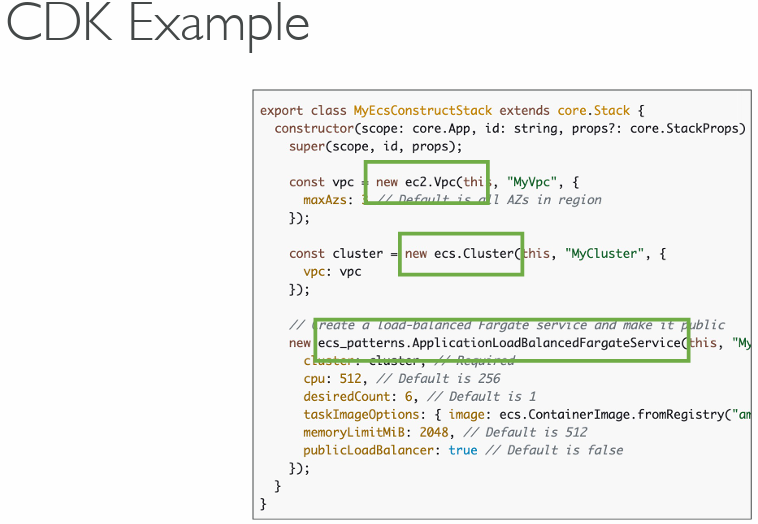

Elastic Beanstalk

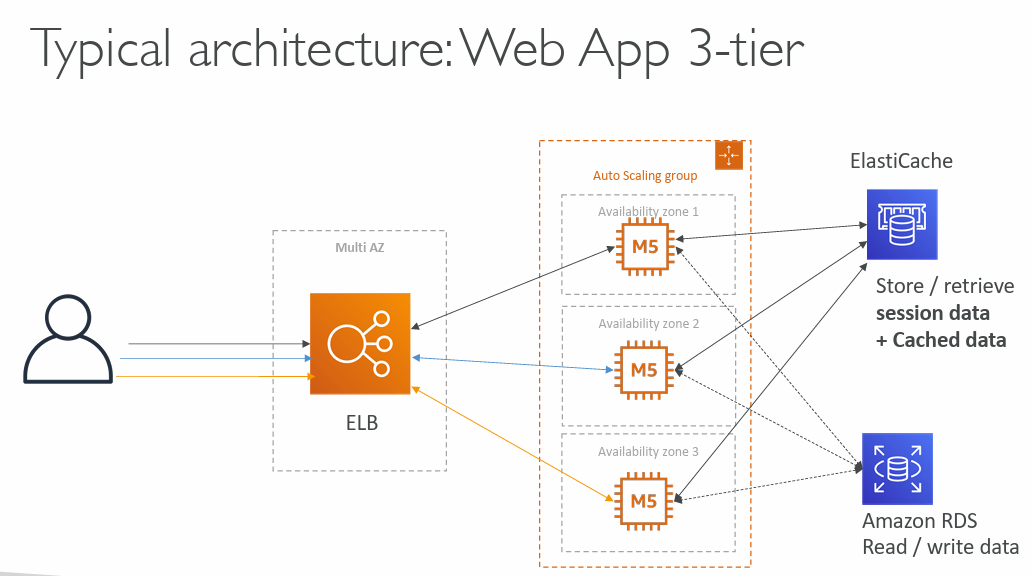

Problemas dos Desenvolvedores na AWS

    • Gerenciando infraestrutura
    • Implantação de código
    • Configuração de todos os bancos de dados, balanceadores de carga, etc.
    • Preocupações com escalabilidade
    • A maioria das aplicações web possui a mesma arquitetura (ALB + ASG)
    • Todos os desenvolvedores querem apenas que seu código seja executado!
    • Possivelmente, de forma consistente em diferentes aplicações e ambientes.

AWS Elastic Beanstalk Overview

    O Elastic Beanstalk é uma visão centrada no desenvolvedor para implantar uma aplicação na AWS.
    Ele utiliza todos os componentes que já vimos antes: EC2, ASG, ELB, RDS, etc...
    Mas tudo é apresentado em uma única visualização que é fácil de entender!
    Ainda temos controle total sobre a configuração.
    Beanstalk = Plataforma como Serviço (PaaS).
    O Beanstalk é gratuito, mas você paga pelas instâncias subjacentes.

Elastic Beanstalk

    Serviço gerenciado.
        A configuração da instância/sistema operacional é tratada pelo Beanstalk.
        Estratégia de implantação é configurável, mas executada pelo Elastic Beanstalk.
        Provisionamento de capacidade.
        Balanceamento de carga e escalabilidade automática.
        Monitoramento da saúde da aplicação e responsividade.

    Apenas o código da aplicação é responsabilidade do desenvolvedor.

    Três modelos de arquitetura:
        Implantação em Instância Única: bom para desenvolvimento.
        LB + ASG: ótimo para aplicações web em produção ou pré-produção.
        Apenas ASG: ótimo para aplicações não-web em produção (trabalhadores, etc.).


Suporte para diversas plataformas:

    Go
    Java SE
    Java com Tomcat
    .NET no Windows Server com IIS
    Node.js
    PHP
    Python
    Ruby
    Construtor de Packer

    Docker de Contêiner Único
    Docker de Múltiplos Contêineres
    Docker Pré-configurado
    
    Se não suportado, é possível escrever sua própria plataforma personalizada (avançado).

Elastic Beanstalk - Monitoramento de Saúde

    O agente de saúde envia métricas para o CloudWatch.
    Verifica a saúde da aplicação e publica eventos de saúde.

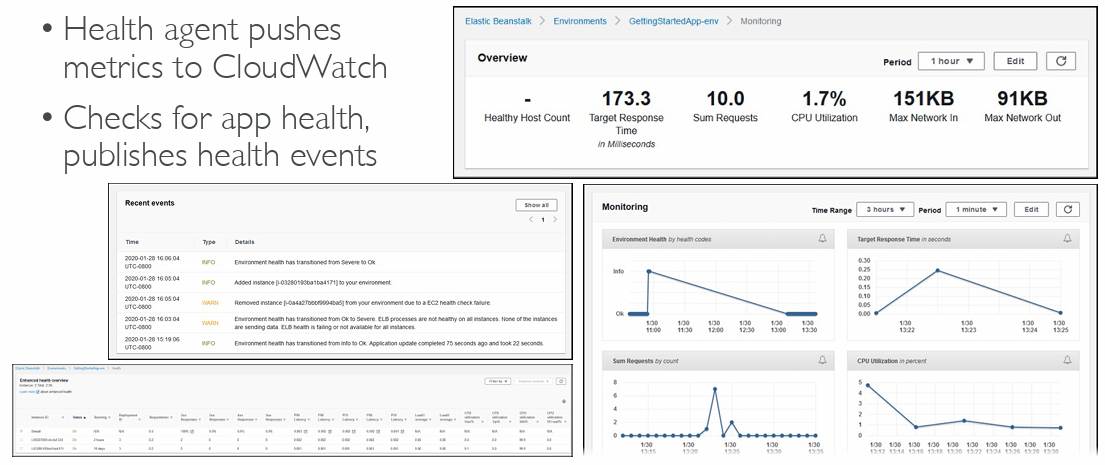


AWS CodeDeploy

    • Queremos implantar nossa aplicação automaticamente
    • Funciona com Instâncias EC2
    • Funciona com Servidores On-Premises
    • Serviço híbrido
    • Servidores/Instâncias devem ser provisionados e configurados com antecedência com o Agente CodeDeploy

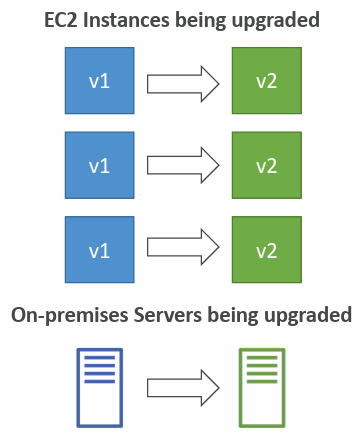

AWS CodeCommit

    • Antes de enviar o código da aplicação para os servidores, ele precisa ser armazenado em algum lugar
    • Os desenvolvedores geralmente armazenam o código em um repositório, usando a tecnologia Git
    • Uma oferta pública famosa é o GitHub, o produto concorrente da AWS é o CodeCommit

    • CodeCommit:
    
        • Serviço de controle de origem que hospeda repositórios baseados em Git
        • Facilita a colaboração com outros no código
        • As alterações de código são automaticamente versionadas
        • Benefícios:
        • Totalmente gerenciado
        • Escalável e altamente disponível
        • Privado, Seguro, Integrado com a AWS

AWS CodeBuild

    • Serviço de construção de código na nuvem (o nome é óbvio)
    • Compila código-fonte, executa testes e produz pacotes prontos para serem implantados (por exemplo, pelo CodeDeploy)

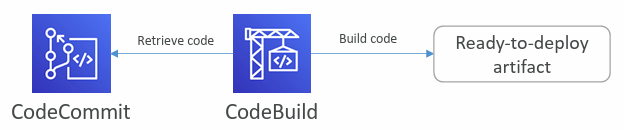

    • Benefícios:
    • Totalmente gerenciado, sem servidor
    • Escalável continuamente e altamente disponível
    • Seguro
    • Preços pay-as-you-go - pague apenas pelo tempo de construção

AWS CodePipeline

    Orquestrar os diferentes passos para que o código seja automaticamente enviado para produção
    • Código => Construção => Teste => Provisionamento => Implantação
    • Base para CI/CD (Integração Contínua e Entrega Contínua)
    • Benefícios:
    • Totalmente gerenciado, compatível com CodeCommit, CodeBuild, CodeDeploy, Elastic Beanstalk, CloudFormation, GitHub, serviços de terceiros (GitHub...) e plugins personalizados...
    • Entrega rápida e atualizações rápidas

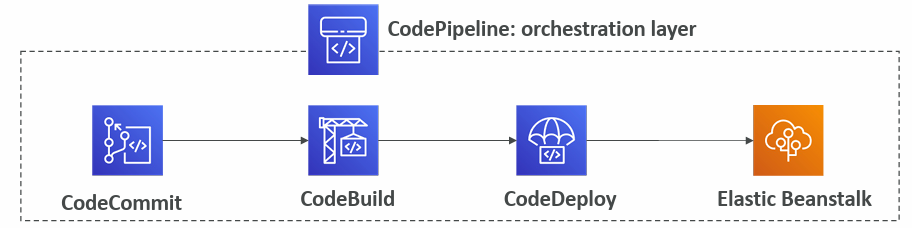

AWS CodeArtifact

    • Pacotes de software dependem uns dos outros para serem construídos (também chamados de dependências de código), e novos são criados.
    • Armazenar e recuperar essas dependências é chamado de gerenciamento de artefatos.
    • Tradicionalmente, você precisa configurar seu próprio sistema de gerenciamento de artefatos.
    • O CodeArtifact é um gerenciamento de artefatos seguro, escalável e econômico para o desenvolvimento de software.
    • Funciona com ferramentas comuns de gerenciamento de dependências, como Maven, Gradle, npm, yarn, twine, pip e NuGet.
    • Os desenvolvedores e o CodeBuild podem então recuperar dependências diretamente do CodeArtifact.

AWS CodeStar

    • Interface unificada para gerenciar facilmente atividades de desenvolvimento de software em um só lugar.
    • "Forma rápida" de começar a configurar corretamente o CodeCommit, CodePipeline, CodeBuild, CodeDeploy, Elastic Beanstalk, EC2, etc...
    • Pode editar o código "na nuvem" usando o AWS Cloud9.

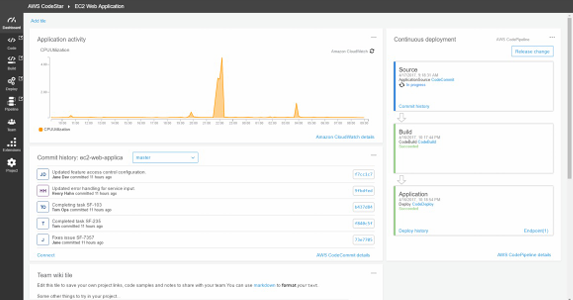

AWS Cloud9

    O AWS Cloud9 é um IDE (Ambiente Integrado de Desenvolvimento) na nuvem para escrever, executar e depurar código.
    • IDEs "clássicos" (como IntelliJ, Visual Studio Code...) são baixados em um computador antes de serem usados.
    • Um IDE na nuvem pode ser usado dentro de um navegador da web, o que significa que você pode trabalhar em seus projetos do seu escritório, casa ou qualquer lugar com internet, sem a necessidade de configuração.
    • O AWS Cloud9 também permite a colaboração em código em tempo real (programação em dupla).

AWS Systems Manager (SSM)

    • Ajuda você a gerenciar seus sistemas EC2 e On-Premises em escala.
    • Outro serviço híbrido da AWS.
    • Obtenha insights operacionais sobre o estado da sua infraestrutura.
    • Conjunto de mais de 10 produtos.
    • As características mais importantes são:
         Automação de patches para conformidade aprimorada.
         Execução de comandos em toda a frota de servidores.
         Armazenamento de configurações de parâmetros com o SSM Parameter Store.
    • Funciona para Linux, Windows, MacOS e Raspberry Pi OS (Raspbian).

How Systems Manager works

    Precisamos instalar o agente SSM nos sistemas que controlamos.
    • Instalado por padrão no Amazon Linux AMI e em algumas AMI do Ubuntu.
    • Se uma instância não pode ser controlada com o SSM, provavelmente é um problema com o agente SSM!
    • Graças ao agente SSM, podemos executar comandos, aplicar patches e configurar nossos servidores.

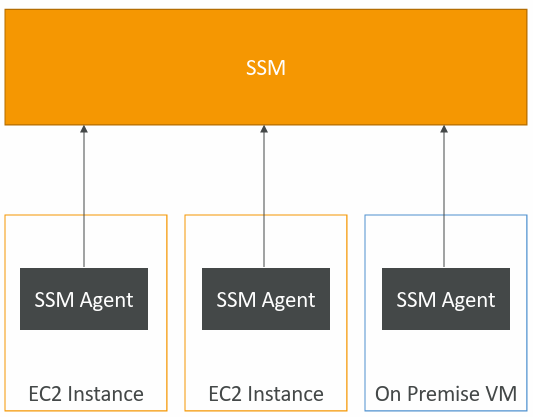

Systems Manager – SSM Session Manager

    • Permite iniciar um shell seguro em seus servidores EC2 e On-Premises.
    • Sem acesso SSH, hosts de bastião ou chaves SSH necessárias.
    • Sem porta 22 necessária (melhor segurança).
    • Suporta Linux, macOS e Windows.
    • Envie dados de log da sessão para o S3 ou CloudWatch Logs.

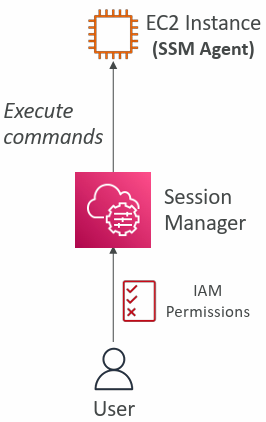






























































































































































